# 図表を作る

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
from us2s_OV_CA import us2s_OV_CA, plot_pattern, plot_fundamental

## 典型的なus2s-OV CAの時空図

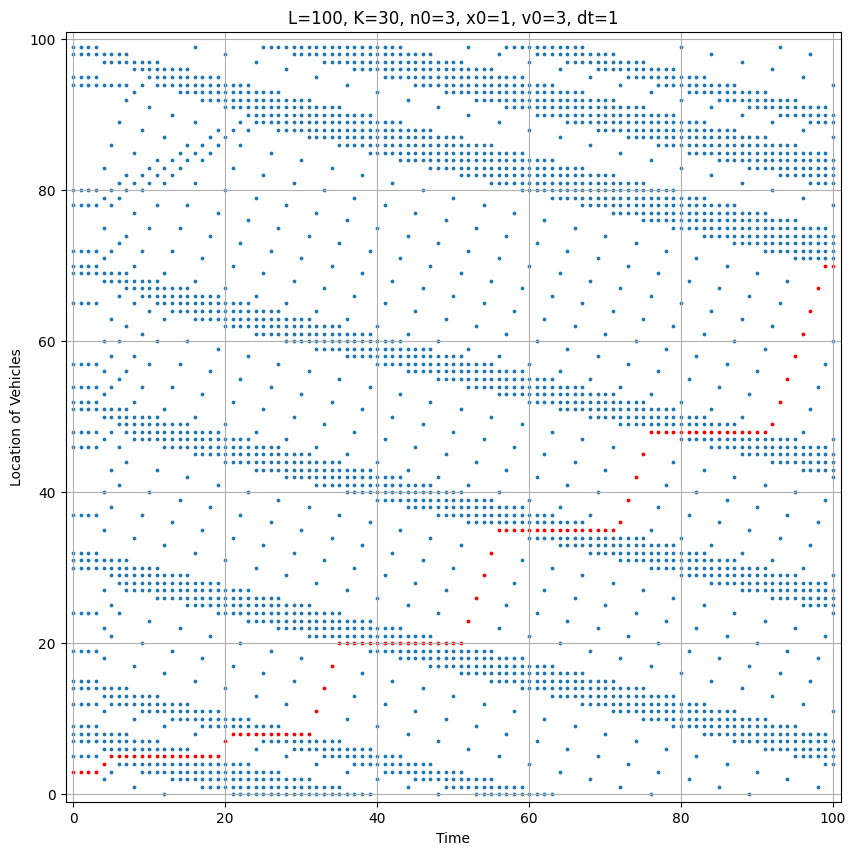

In [3]:
model = us2s_OV_CA(
	L=100,
	K=30,
	n_0=3,
	v_0=3,
	x_init=sorted(random.sample(range(100), 30)),
	n_max=1010,
	x_0=1,
	dt=1
)
model.simulate()
plot_pattern(model, 0, 100)

## us2s-OV CAの基本図

n_0=   4, v_0=   3, vmin=   3, K=  24

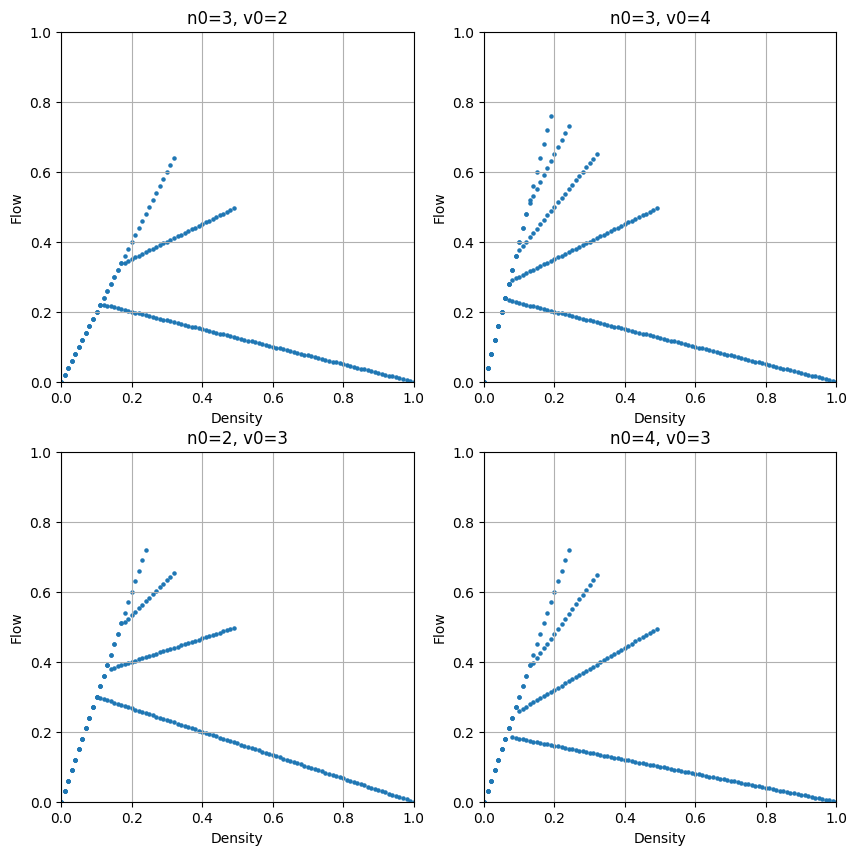

In [4]:
L = 100
x_0 = 1
dt = 1
n_max = 1100
n_0_list = [3, 3, 2, 4]
v_0_list = [2, 4, 3, 3]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

axs = [ax1, ax2, ax3, ax4]


for ax, n_0, v_0 in zip(axs, n_0_list, v_0_list):
	density = []
	flow = []
	for vmin in range(v_0 + 1):
		# 最低速度がvminである状況を作る
		for K in range(101 // (vmin + 1)):
			print("\rn_0={:4d}, v_0={:4d}, vmin={:4d}, K={:4d}".format(n_0, v_0, vmin, K), end="")
			model = us2s_OV_CA(
				L=L,
				K=K,
				n_0=n_0,
				v_0=v_0,
				x_init=[(vmin + 1) * i for i in range(K)],
				n_max=1100,
				x_0=x_0,
				dt=dt
			)
			model.simulate()
			density.append(model.density())
			flow.append(model.flow(800, 800 + model.n_0))
	plot_fundamental(ax, model, density, flow)